# Sprint 08 Tasca 01
___

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

### Abstract
Per a aquest exercici continuarem amb el dataset històric dels jugadors de la NBA usada en els exercicis anteriors, aquest conté gairebe 4000 jugadors de 67 lligues
### Sources

#### Dataset :
- https://www.kaggle.com/datasets/drgilermo/nba-players-stats

#### References :
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/


- https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/


- https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f


- https://es.wikipedia.org/wiki/Metro#Nuevo_patr%C3%B3n_de_1889


In [1]:
# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
from numpy.random import seed
from scipy.stats import shapiro

# Data Visualization Libraries :
import seaborn as sb 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# ML Libraries :
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


#metodes
def is_gaussian(series):
    shapiro_test = shapiro(series)
    p = shapiro_test.pvalue
    alpha = 0.05
    if p > alpha:
        print('YES, we can assume Normal Distribution  p-Value:', p)
    else:
        print('NO, its not Gaussian p-Value', p)  
        

def standard_scaler(data):
    object = StandardScaler()
    scale = object.fit_transform(data)
    return scale        
   

In [2]:
%matplotlib inline

#Dataset and info() 
players = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S05\\Players.csv')
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


Com es pot comprovar les variables categòriques que conté aquest dataset son les relatives a:
        
- Player (Nom)
- College (Universitat)
- Birth City (Ciutat de naixement)
- Birth State (Estat de naixement)


La variable nom no ens aportarà res i la de ciutat podria ser massa dispersa, per tant per la realització d'aquest exercici (i per evitar masses dades) realitzarem el dummy sobre els atributs relatius a la universitat i al estat de naixement.

In [3]:
#REALITZEM EL GET_DUMMIES SOBRE LES COLUMNES ESPECIFICADES:

pd.get_dummies(data = players, 
               columns = ['collage', 'birth_state'] )

,index,Player,height,weight,born,birth_city,collage_Acadia University,collage_Alabama A&M University,collage_Alabama State University,collage_Albany State University,...,birth_state_United Kingdom,birth_state_United Republic of Tanzania,birth_state_Uruguay,birth_state_Utah,birth_state_Venezuela,birth_state_Virginia,birth_state_Washington,birth_state_West Virginia,birth_state_Wisconsin,birth_state_Wyoming
0,0,Curly Armstrong,180.0,77.0,1918.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Cliff Barker,188.0,83.0,1921.0,Yorktown,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Leo Barnhorst,193.0,86.0,1924.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Ed Bartels,196.0,88.0,1925.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Ralph Beard,178.0,79.0,1927.0,Hardinsburg,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,3917,Troy Williams,198.0,97.0,1969.0,Columbia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3918,3918,Kyle Wiltjer,208.0,108.0,1992.0,Portland,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3919,3919,Stephen Zimmerman,213.0,108.0,1996.0,Hendersonville,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3920,3920,Paul Zipser,203.0,97.0,1994.0,Heidelberg,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Les variables numèriques son en aquest cas:

- L'alçada (height) : les seves unitats son cm. <span style="color:red">Suposem Distribució Normal (a priori)</span>.
- Pes (weight): les seves unitats son kg. <span style="color:red">Suposem Distribució Normal (a priori)</span>.
- L'any de naixement (born): les seves unitats son anys. <span style="color:red">No sabem que suposar</span>.

*(A priori, ve a dir sense comprobar res)* Per tant realitzarem una exploració per a poder confirmar la suposada distribució Normal de les variables escollides per al exercici.

Per a fer-ho, es plantegen dos tipus de maneres per a resoldre l'exercici. I com que estic aprentne em toca fer els dos:
1. Una manera sería resoldre a través de conceptes i calculs (l'anomenariem **Numèrica**)


2. L'altra seria resoldre a través de la interpretació visual de les dades (l'anomenariem **Z-42**..., es broma! Visual..., no?).

___

## Resolució Numèrica (a.k.a Statistical tests)
### Mètode
1. Numèricament sabem que si la media, la mediana i el mode son molt similars podem assumir una distribució normal o no. Per a aixó aplicarem un display sobre els metodes .describe() i .mode().

    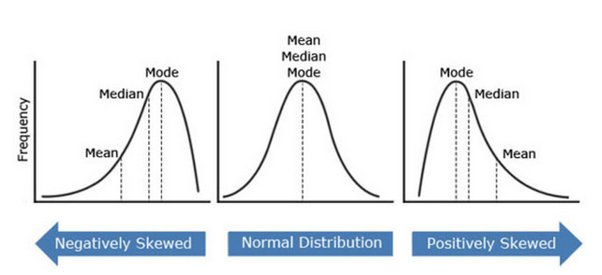

2. En el cas que no obtinguèssim una resposta clara en una variable:

- Utilitzarém un test de Normalitat Shapiro-Wilk en un metode al-ús (*Inici a sota dels imports) anomenat is_gaussian() que ens dira si la distribució de la nostra variable normal. En aquest test, partim de la Hipotesis nul·la (H<sub>0</sub>) que la mostra que tenim té una distribució normal i si no podem refutar-la (s'hauria de donar un p-value < 0.05) llavors n'assumirem la normalitat.
    

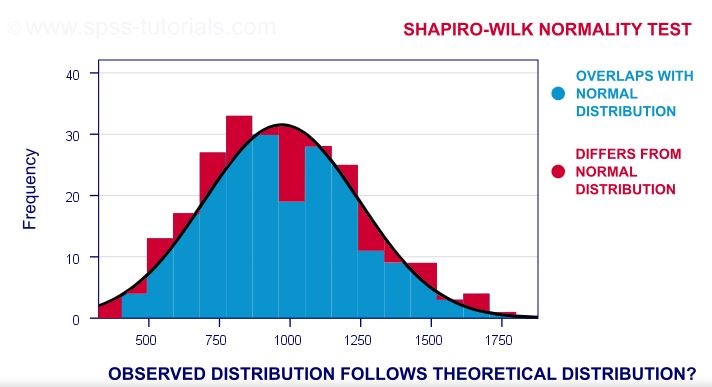

- Contrastarem amb el coeficient de Kurtosis de la variable, que ens donarà una imatge de com de plana o en punxa es la curva de distribució.

    

    

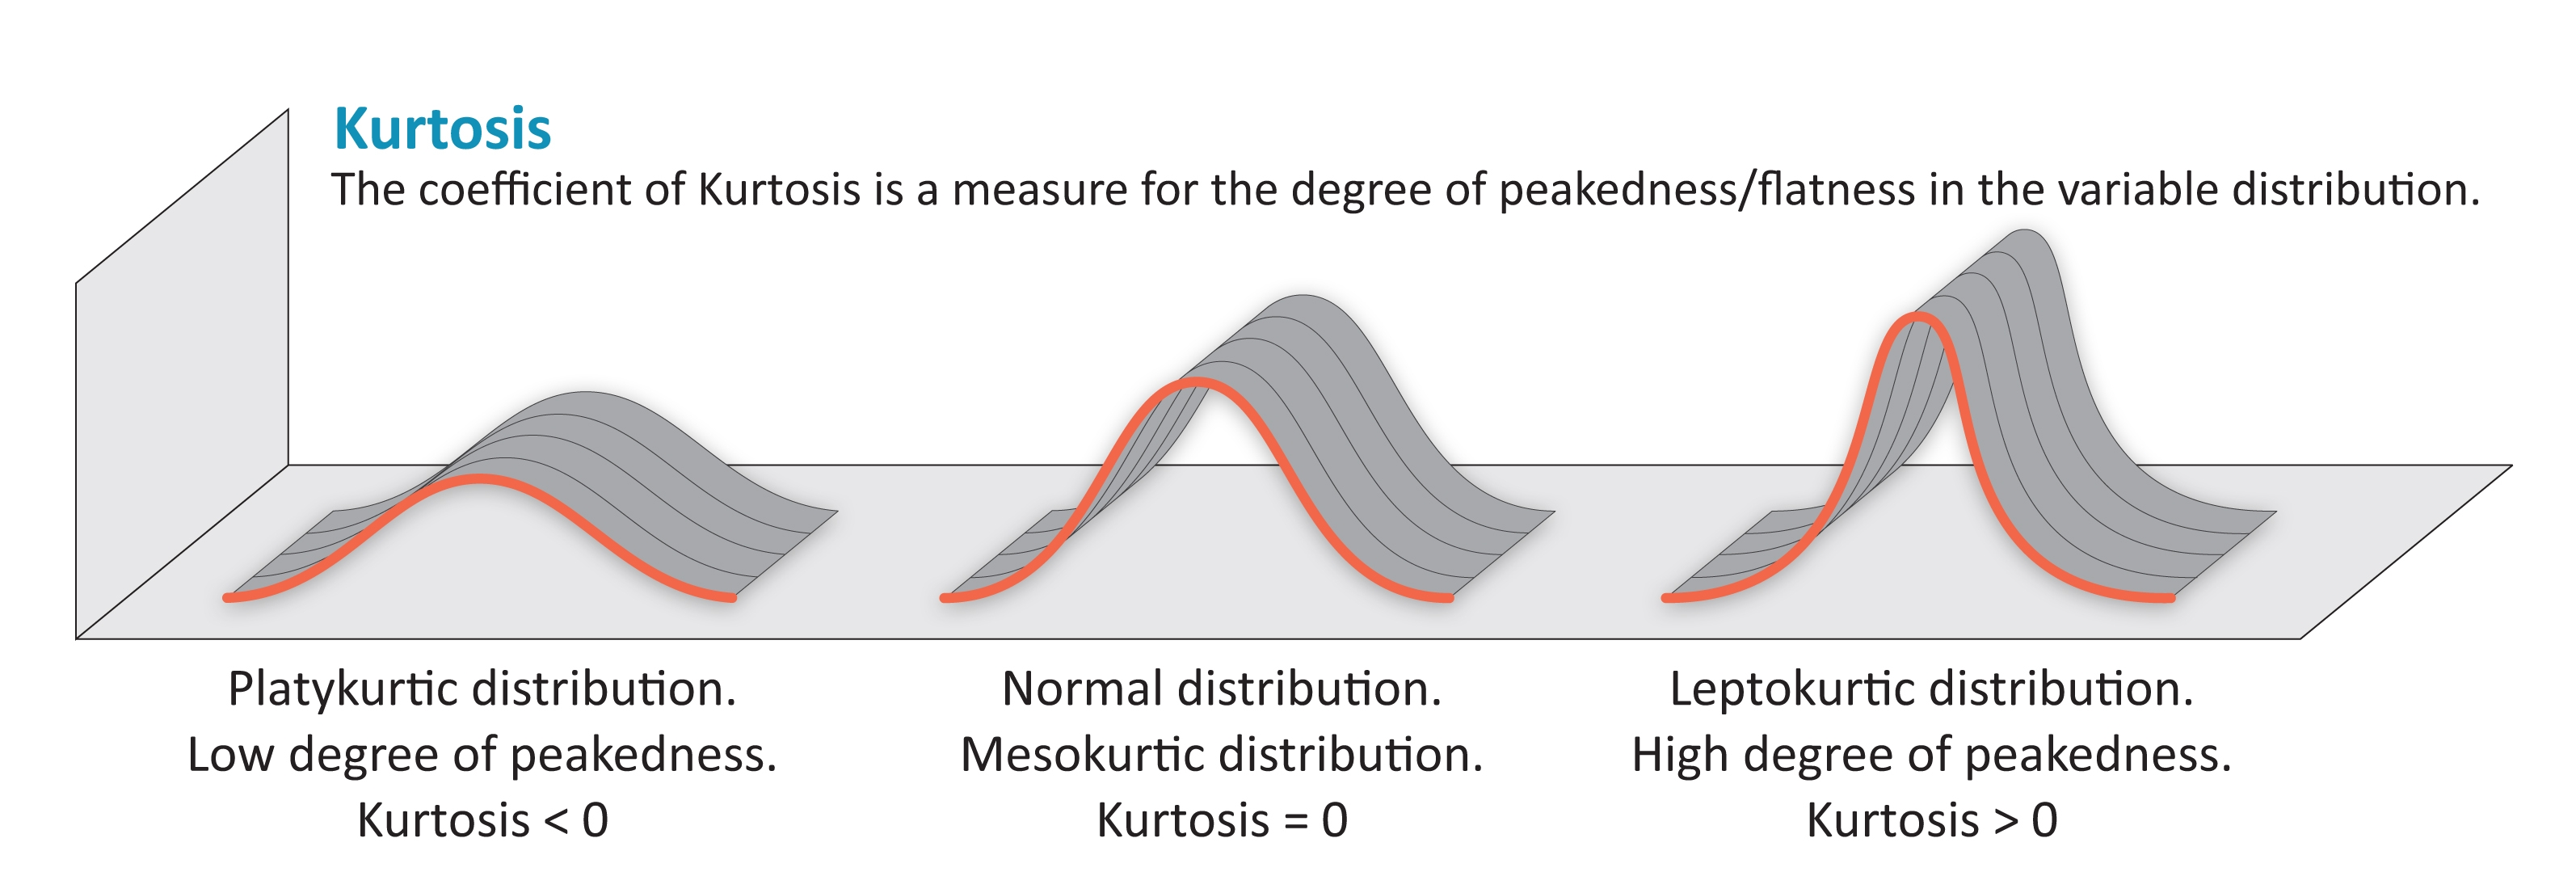

In [4]:
#Consultem mean, median, mode: 
display(players.describe())
display(players.mode(numeric_only = True).head(1))

,index,height,weight,born
count,3922.000000,3921.000000,3921.000000,3921.00000
mean,1960.500000,198.704922,94.783219,1962.37975
std,1132.328206,9.269761,12.039515,20.33491
min,0.000000,160.000000,60.000000,1913.00000
25%,980.250000,190.000000,86.000000,1948.00000
50%,1960.500000,198.000000,95.000000,1964.00000
75%,2940.750000,206.000000,102.000000,1979.00000
max,3921.000000,231.000000,163.000000,1997.00000


,index,height,weight,born
0,0,201.0,83.0,1970.0


### Alçada
- ALÇADA : 198.7 / 198 / 201 -> <span style="color:green">Distribució Normal</span>.
    - Efectivament normal, els 3 valors son molt similars.
    - Com no està de mès i ja sabem el resultat del test de normalitat sense fer-lo, el realitzarem a modo de prova de control "extra".

In [64]:
#Apliquem el metode del test de normalitat a la prova control:
print('PROVA CONTROL + Shapiro-Wilk\n ')

is_gaussian(players['height'].sample(n=1000))

PROVA CONTROL + Shapiro-Wilk
 
YES, we can assume Normal Distribution  p-Value: 1.0


### Pes
- PES : 94.7 / 95 / 83 -> <span style="color: orange">No Normal?</span> 
    - (mean == median .Però el mode es troba a una distancia igual a la seva desviació estàndar ($\sigma$).Això podria indicar la presencia de dos grups definits clarament al voltant de la separació de la mitjana i per tant una distribució Bi-Modal.

In [53]:
#Apliquem el metode del test de normalitat:
is_gaussian(players['weight'].sample(n=1000))

YES, we can assume Normal Distribution  p-Value: 1.0


### Any de naixement
- ANY : 1962 / 1964 / 1970 -> <span style="color:red">Denied!</span>.
    - Al tractarse d'una linia temporal (les lligues van per anys i no tenim informació ), i no tenint en compte les edats dels jugadors sinó el seu any de naixement, crec que aquestes dades numèriques NO poden entendre's com una variable continua sinó que haurien ser tractades teòricament com a Categòriques Ordinals, elaboro a  continuació: 
    
    Aixi com el model Kg o cm "no ha canviat" (obviarem el període de 160 anys en el que "una barra de metall" ja anava bé com a mesura internacional)*(Sources wiki)* les seves referències (patró) al llarg del temps, i aixó precisament és el que ens permet comparar-ne els resultats.
    
    (2 jugadors de 70kg > 1 Jugador de 120kg) 
    
    El "Temps" i mes concretament el model d'any de naixement, només es un punt de referencia(una dada aillada) però els que ens movem som nosaltres amb el present de cada lliga(patró), llavors l'antigüetat serà una variable independent en comptes de dependent ja que ens donarà un valor diferent depenent de en quin any de lliga mirem 
    
    (¿¿ 2 Jugadors nascut 1968 > 1 Jugador nascut 1994 ??)
    
    En aquest context un any com 1946, per si sol, no és gaire més que el que seria un color RGB o les Universitats (bé, tampoc perque aquests es mantenen amb el pas del temps). La seva edat al començar, els anys en actiu,...etc, totes es contrasten amb el concepte fixe del jugador de basket, sempre començaran a jugar X jugadors amb 18, 23 i ... n edat, o tindràn 12, 6, 4, ... n anys de carrera professional. Però aquesta lliga no començarà a jugar cap jugador nascut el 1970 i si en treus una mitjana serà irreal, 
    
    Per últim, en especial, perque d'una manera intuitiva i no pas per això menys rigorosa, sospito que podem començar a desconfiar de la idea d'un jugador nascut el 1913 marcant-se uns "mates" a la NBA.

In [66]:
#Apliquem el metode del test de normalitat:
is_gaussian(players['born'].sample(n=1000))

NO, its not Gaussian p-Value 3.505558084077433e-15


### Conclusions test numèric

Podem afirmar que les variables alçada i pes del dataset estudiat indiquen una distribució normal Gaussiana. 
___

## Resolució Z-42 (a.k.a Graphical Methods)
1. **Gràficament** podrem veure clarament les distribucions. Afegirem també marques per a la mitja, la mitjana, i el mode amb el codi de colors següent: 
- Mean (<span style="color:green">***Verd***</span>)
- Median (<span style="color:red">***Vermell***</span>)
- Mode (<span style="color:navy">***Blau fosc***</span>)
2. En el cas que no obtinguèssim una resposta clara en una variable, utilitzaríem un QQPlot (Quantile Vs Quantile Plot) per a visualitzar-ne el tipus de distribució . Aquest plot ens mostrarà com es distribueix la desviació al llarg de la variable. 
    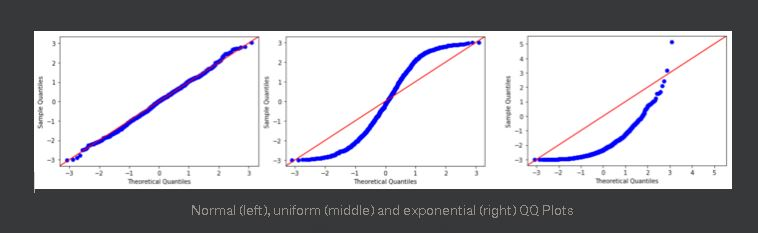

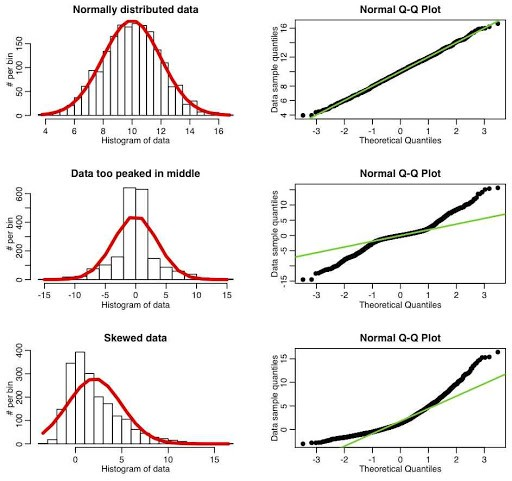

Realitzarem unes visualizacions exploratories sobre les variables juntes amb kdeplot, i després ja realitzarem un histograma

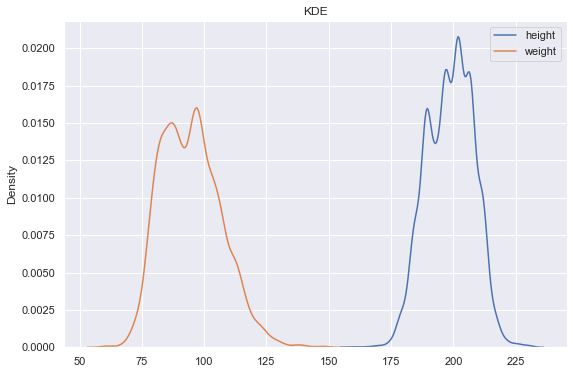

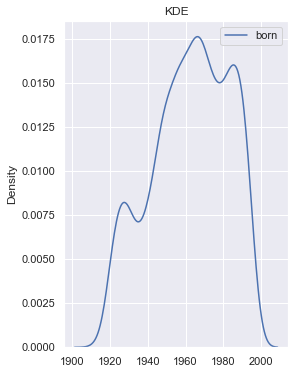

In [13]:
#Plot alçada i pes juntes:
a = sb.kdeplot(data = players[['height', 'weight']])
a.set(title = 'KDE')
a.figure.set_size_inches(9,6)
plt.show(a)

#Plot any de naixement
b = sb.kdeplot(data = players[['born']])
b.set(title = 'KDE')
b.figure.set_size_inches(4,6)
plt.show(b)

___
### Alçada

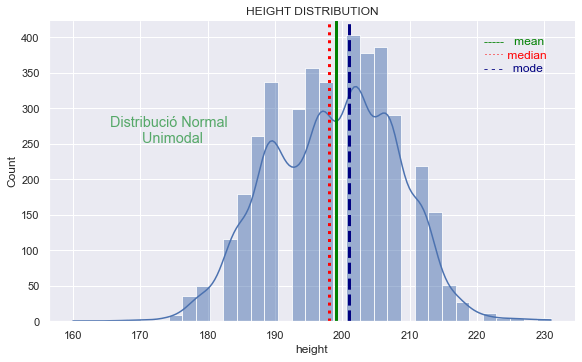

In [14]:
#Plot type, títol i tamany:
a = sb.displot(data = players['height'], kde = True)
a.set(title = 'HEIGHT DISTRIBUTION')
a.fig.set_size_inches(9,5)

#Afegim linies per marcar:
plt.axvline(x = 199, ymin = 0, color = 'green', linewidth =3, ls = '-' )
plt.axvline(x = 198, ymin = 0, color = 'red', linewidth = 3, ls = ':' )
plt.axvline(x = 201, ymin = 0, color = 'navy', linewidth = 3, ls = '--' )

#Afegim Anotacions
a.fig.suptitle(t = 'Distribució Normal \n Unimodal', color = 'g', x = 0.34, y = 0.7 )
plt.text(221,390,'-----   mean  ',c='green')
plt.text(221,370,'····· median',c='red')
plt.text(221,352,'- - -   mode  ',c='navy')

plt.show(a)
plt.close()

C:\Users\motxi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


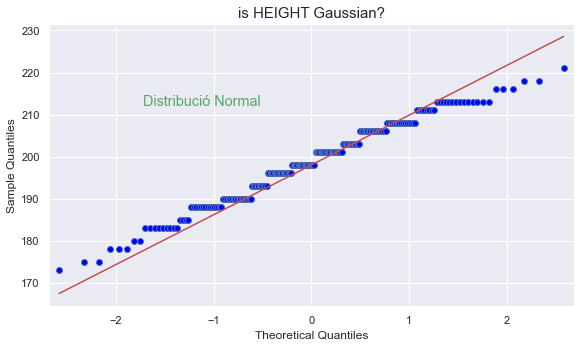

In [43]:
#Plot qqplot
fig = qqplot(players['height'].sample(n=200), line = 'q')
fig.set_size_inches(9.4,5.2)
fig.figure.suptitle(t = 'Distribució Normal', color = 'g', x = 0.35, y = 0.69 )
plt.title('is HEIGHT Gaussian?', size=15)
plt.show(a)

___
###  Pes

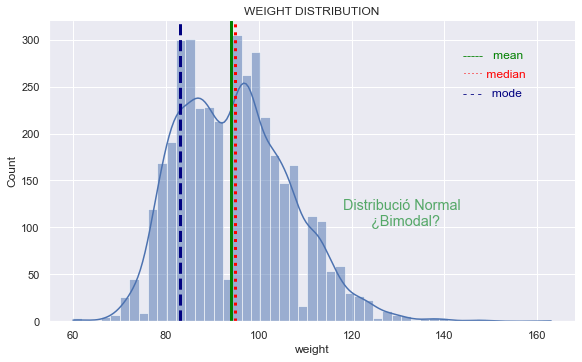

<Figure size 432x288 with 0 Axes>

In [34]:
#Plot sets
b = sb.displot(data = players['weight'], kde = True)
b.set(title = 'WEIGHT DISTRIBUTION')
b.fig.set_size_inches(9,5)

#Afegim linies-marcadors:
plt.axvline(x = 94, ymin = 0, color = 'green', linewidth =3, ls = '-' )
plt.axvline(x = 95, ymin = 0, color = 'red', linewidth = 3, ls = ':' )
plt.axvline(x = 83, ymin = 0, color = 'navy', linewidth = 3, ls = '--' )

#Afegim Anotacions
b.fig.suptitle(t = 'Distribució Normal \n ¿Bimodal?', color = 'g', x = 0.70, y = 0.47 )
plt.text(144,280,'-----   mean  ',c='green')
plt.text(144,260,'····· median',c='red')
plt.text(144,240,'- - -   mode  ',c='navy')

plt.show(b)
plt.clf()

C:\Users\motxi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


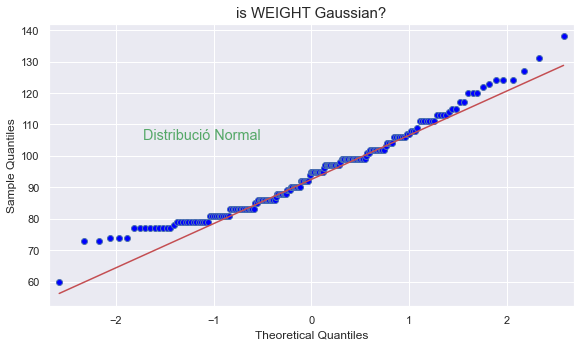

In [42]:
#Plot qqplot

fig = qqplot(players['weight'].sample(n=200), line = 'q')
fig.set_size_inches(9.4,5.2)
fig.figure.suptitle(t = 'Distribució Normal', color = 'g', x = 0.35, y = 0.60 )
plt.title('is WEIGHT Gaussian?', size=15)
plt.show(a)

___
### Any de Naixement

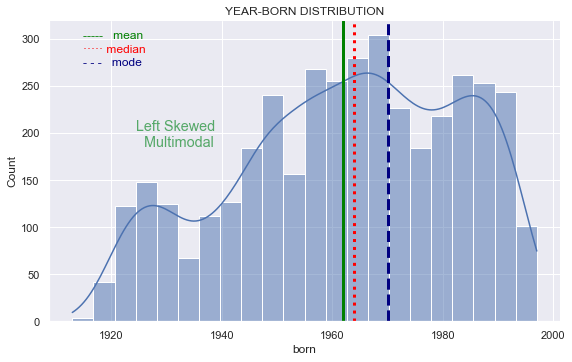

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot set
c = sb.displot(data = players['born'], kde = True)
c.set(title = 'YEAR-BORN DISTRIBUTION')
c.fig.set_size_inches(9,5)

#afegim linies-marcadors:
plt.axvline(x = 1962, ymin = 0, color = 'green', linewidth = 3, ls = '-' )
plt.axvline(x = 1964, ymin = 0, color = 'red', linewidth = 3, ls = ':' )
plt.axvline(x = 1970, ymin = 0, color = 'navy', linewidth = 3, ls = '--' )

#Afegim Anotacions
c.fig.suptitle(t = 'Left Skewed \n Multimodal', color = 'g', x = 0.35, y = 0.69 )
plt.text(1915,300,'-----   mean  ',c='green')
plt.text(1915,285,'····· median',c='red')
plt.text(1915,272,'- - -   mode  ',c='navy')

plt.show(c)
plt.clf()

C:\Users\motxi\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


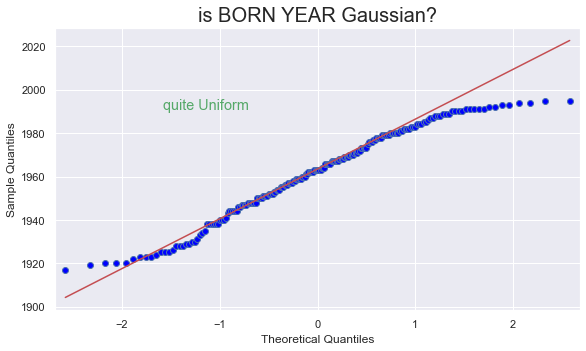

In [31]:
#Test de Normalitat
#Plot qqplot

fig = qqplot(players['born'].sample(n=200), line = 'q')
fig.set_size_inches(9.4,5.2)
plt.title('is BORN YEAR Gaussian?', size=20)
fig.figure.suptitle(t = 'quite Uniform \n ', color = 'g', x = 0.35, y = 0.69 )
plt.show(a)

___
### Conclusions Métodes gràfics

- Les variables alçada i pes del dataset estudiat tenen una distribució normal Gaussiana. 

- La variable any de naixement 
___

array([[-2.01810036, -1.47725934, -2.1827198 ],
       [-1.15496911, -0.97883685, -2.03517144],
       [-0.61551208, -0.72962561, -1.88762308],
       ...,
       [ 1.54231604,  1.09792352,  1.6535376 ],
       [ 0.46340198,  0.18414895,  1.55517202],
       [ 1.86599026,  2.09476849,  1.70272038]])

<AxesSubplot:ylabel='Count'>

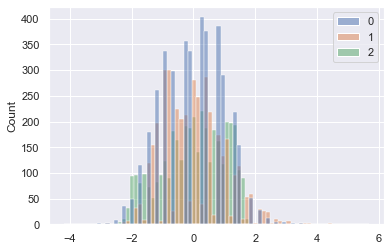

In [44]:
# REALITZEM EL STANDARD SCALER SOBRE ELS ATRIBUTS NUMERICS
data = standard_scaler(players[['height', 'weight', 'born']])

# guardem les variables normalitzades independentment per als QQPlots:
norm_height = standard_scaler(players[['height']])
norm_weight = standard_scaler(players[['weight']])
norm_born = standard_scaler(players[['born']])

#Check data resultant:
display(data)

#Plot data to check:
sb.set()
sb.histplot(data =data)

- Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.



- Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.


